In [1]:
%%html
<style> table {margin-left: 0 !important;} </style>

In [2]:
def impulse1D(distance,time,mass,dispersion,velocity):
    import math
    term1 = math.sqrt(4.0*math.pi*dispersion*time)
    term2 = math.exp(-((distance-velocity*time)**2)/(4.0*dispersion*time))
    impulse1D = (mass/term1)*term2
    return(impulse1D)

9731.787793845493


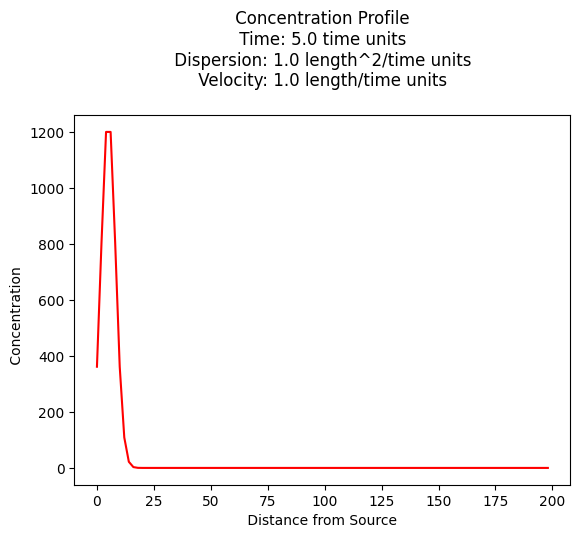

In [3]:
thick       = 1.0
width       = 100.0
length      = 0.01 # small but non-zero
volume      = thick*width*length
porosity    = 1.0
c0          = 10000.0 # kg/m^3
mass        = (c0*volume)/(porosity)
#print(mass)
dispersion  = 1.0 #m^2/day
velocity    = 1.0 #m/day
deltax      = 2.0 #meters
howmany     = 100 #how many points to compute
x = [] #meters
for i in range(howmany):
    x.append(float(i)*deltax)
    
time        = 5.00 # days
acc = []
c = [0 for i in range(howmany)] #concentration 
for i in range(howmany):
    c[i]=impulse1D(x[i],time,mass,dispersion,velocity)
    acc.append(c[i]*deltax)
print(sum(acc))
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(x,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration Profile \n Time: " + repr(time) + " time units \n" + " Dispersion: " + repr(dispersion) + " length^2/time units \n" + " Velocity: " + repr(velocity) + " length/time units \n") # caption the plot object
plt.xlabel(" Distance from Source ") # label x-axis
plt.ylabel(" Concentration        ") # label y-axis
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use
#print("Advective Front Position : ",round(time*velocity,2)," length units")
#print("Total Mass : ",round(mass,3)," kg")


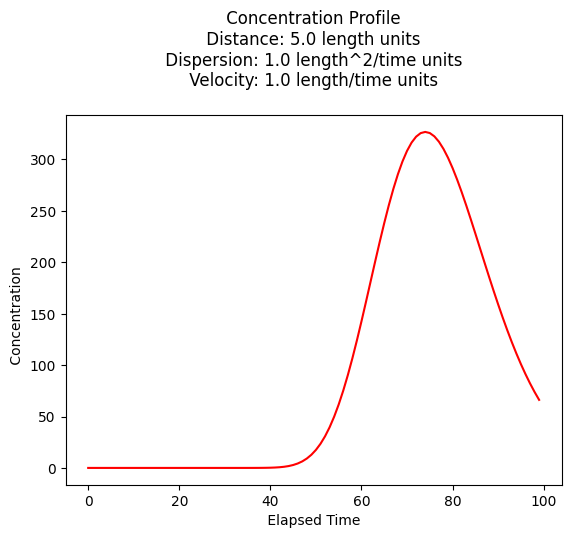

In [4]:
thick       = 1.0
width       = 100.0
length      = 0.01 # small but non-zero
volume      = thick*width*length
porosity    = 1.0
c0          = 10000.0 # kg/m^3
mass        = (c0*volume)/(porosity)
dispersion  = 1.0 #m^2/day
velocity    = 1.0 #m/day
deltat      = 1.0 #days
howmany     = 100 #how many points to compute
t = [] #meters
for i in range(howmany):
    t.append((float(i)+0.00001)*deltat)
    
space        = 75.0 # meters

c = [0 for i in range(howmany)] #concentration 
for i in range(howmany):
    c[i]=impulse1D(space,t[i],mass,dispersion,velocity)
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(t,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration Profile \n Distance: " + repr(time) + " length units \n" + " Dispersion: " + repr(dispersion) + " length^2/time units \n" + " Velocity: " + repr(velocity) + " length/time units \n") # caption the plot object
plt.xlabel(" Elapsed Time ") # label x-axis
plt.ylabel(" Concentration        ") # label y-axis
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use
#print("Advective Front Position : ",round(time*velocity,2)," length units")
#print("Total Mass : ",round(mass,3)," kg")

In [5]:
#
# prototype ogatabanks function
#
def ogatabanks(c_source,space,time,dispersion,velocity):
    from math import sqrt,erf,erfc,exp  # get special math functions
    term1 = erfc(((space-velocity*time))/(2.0*sqrt(dispersion*time)))
    term2 = exp(velocity*space/dispersion)
    term3 = erfc(((space+velocity*time))/(2.0*sqrt(dispersion*time)))
    #print(term3)
    ogatabanks = c_source*0.5*(term1+term2*term3)
    return(ogatabanks)

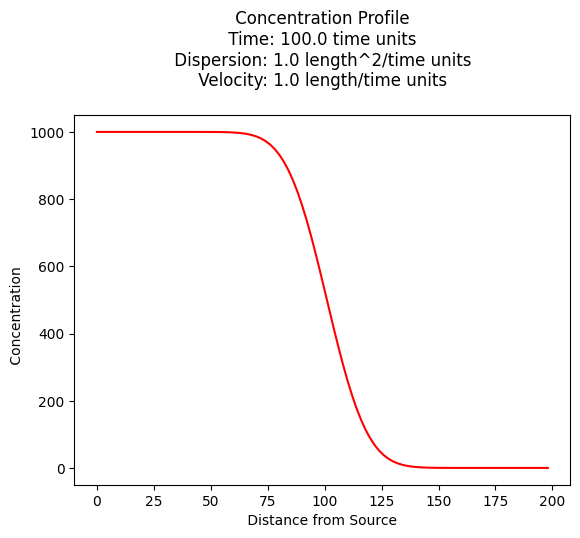

In [6]:
#
# example inputs
#
c_source = 1000.0 # source concentration
space = 200.      # how far in X-direction to extend the plot
time  = 100.       # time since release
dispersion = 1.0  # dispersion coefficient
velocity = 1.0    # pore velocity
#
# forward define and initialize vectors for a profile plot
#
how_many_points = 100   
deltax = space/how_many_points
x = [i*deltax for i in range(how_many_points)] # constructor notation
c = [0.0 for i in range(how_many_points)]      # constructor notation
#
# build the profile predictions
#
for i in range(0,how_many_points,1):
    c[i] = ogatabanks(c_source,x[i],time,dispersion,velocity)
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(x,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration Profile \n Time: " + repr(time) + " time units \n" + " Dispersion: " + repr(dispersion) + " length^2/time units \n" + " Velocity: " + repr(velocity) + " length/time units \n") # caption the plot object
plt.xlabel(" Distance from Source ") # label x-axis
plt.ylabel(" Concentration        ") # label y-axis
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use

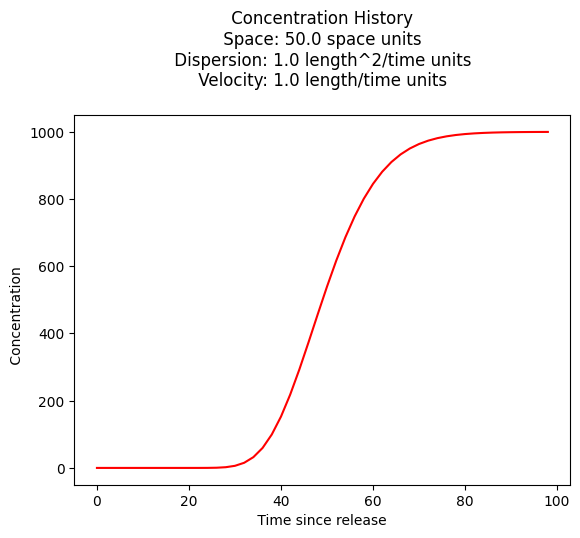

In [7]:
#
# example inputs
#
c_source = 1000.0 # source concentration
space = 50.      # where in X-direction are we
time  = 100.      # how far in T-direction to extend the plot
dispersion = 1.0  # dispersion coefficient
velocity = 1.0    # pore velocity
#
# forward define and initialize vectors for a profile plot
#
how_many_points = 50   
deltat = time/how_many_points
t = [i*deltat for i in range(how_many_points)] # constructor notation
c = [0.0 for i in range(how_many_points)]      # constructor notation

t[0]=1e-5 #cannot have zero time, so use really small value first position in list
#
# build the profile predictions
#
for i in range(0,how_many_points,1):
    c[i] = ogatabanks(c_source,space,t[i],dispersion,velocity)
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(t,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration History \n Space: " + repr(space) + " space units \n" + " Dispersion: " + repr(dispersion) + " length^2/time units \n" + " Velocity: " + repr(velocity) + " length/time units \n") # caption the plot object
plt.xlabel(" Time since release ") # label x-axis
plt.ylabel(" Concentration        ") # label y-axis
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use

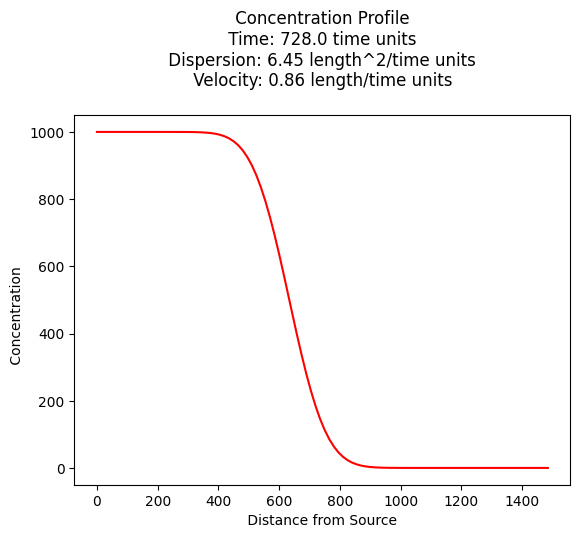

Concentration at x = 750, t = 728 : 112.838  mg/L


In [8]:
#
# example inputs
#
c_source = 1000.0 # source concentration
space = 1500.      # how far in X-direction to extend the plot
time  = 728.       # time since release
dispersion = 6.45  # dispersion coefficient
velocity = 0.86   # pore velocity
#
# forward define and initialize vectors for a profile plot
#
how_many_points = 100   
deltax = space/how_many_points
x = [i*deltax for i in range(how_many_points)] # constructor notation
c = [0.0 for i in range(how_many_points)]      # constructor notation
#
# build the profile predictions
#
for i in range(0,how_many_points,1):
    c[i] = ogatabanks(c_source,x[i],time,dispersion,velocity)
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(x,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration Profile \n Time: " + repr(time) + " time units \n" + " Dispersion: " + repr(dispersion) + " length^2/time units \n" + " Velocity: " + repr(velocity) + " length/time units \n") # caption the plot object
plt.xlabel(" Distance from Source ") # label x-axis
plt.ylabel(" Concentration        ") # label y-axis
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use

print("Concentration at x = 750, t = 728 :",round(ogatabanks(c_source,750.0,728.0,dispersion,velocity),3)," mg/L")

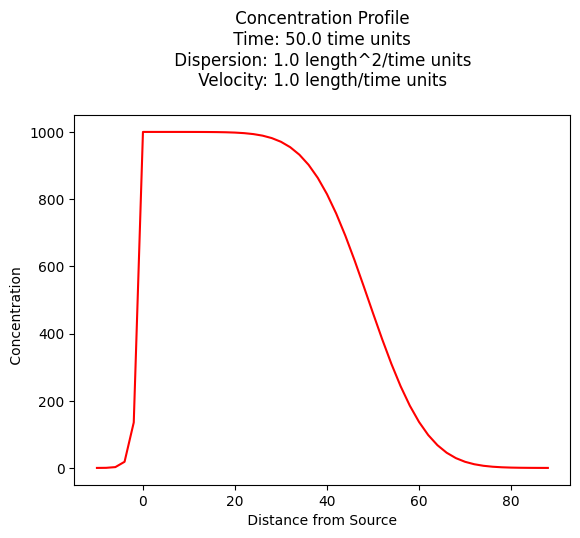

In [9]:
from math import sqrt,erf,erfc,exp  # get special math functions
#
# prototype sauty function
#
def sauty(c_source,injection,porosity,space,time,dispersion,velocity):
    term0 = (c_source*injection)/(2.0*porosity*velocity)
    term1 = exp( 0.5*velocity*space/dispersion)
    term3 = exp(-0.5*velocity*abs(space)/dispersion)
    term4 = erfc(((abs(space)-velocity*time))/(2.0*sqrt(dispersion*time)))
    term5 = exp( 0.5*velocity*abs(space)/dispersion)
    term6 = erfc(((abs(space)+velocity*time))/(2.0*sqrt(dispersion*time)))
    sauty = term0*term1*(term3*term4-term5*term6)
    return(sauty)
#
# example inputs
#
c_source = 1000.0 # source concentration
space = 100.      # how far in X-direction to extend the plot
time  = 50.       # time since release
injection = 0.5   # injection volume rate
porosity = 0.5    # porosity
dispersion = 1.0  # dispersion coefficient
velocity = 1.0    # pore velocity
#
# forward define and initialize vectors for a profile plot
#
how_many_points = 50   
deltax = space/how_many_points
x = [(i-5)*deltax for i in range(how_many_points)] # constructor notation plot some -x values
c = [0.0 for i in range(how_many_points)]      # constructor notation
#
# build the profile predictions
#
for i in range(0,how_many_points,1):
    c[i] = sauty(c_source,injection,porosity,x[i],time,dispersion,velocity)
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(x,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration Profile \n Time: " + repr(time) + " time units \n" + " Dispersion: " + repr(dispersion) + " length^2/time units \n" + " Velocity: " + repr(velocity) + " length/time units \n") # caption the plot object
plt.xlabel(" Distance from Source ") # label x-axis
plt.ylabel(" Concentration        ") # label y-axis
#plt.savefig("sautyplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use

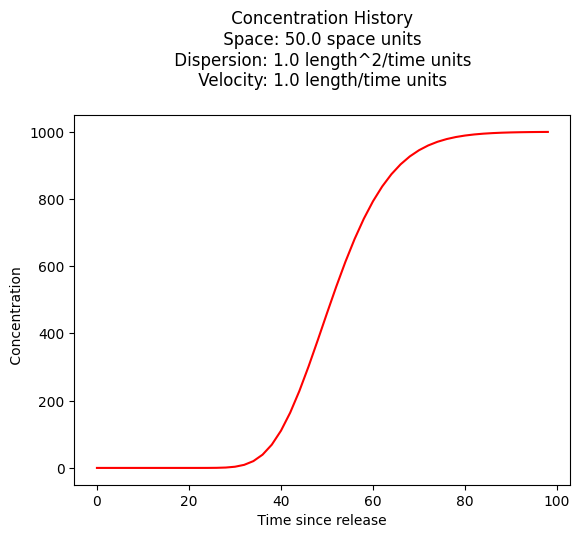

In [10]:
from math import sqrt,erf,erfc,exp  # get special math functions
#
# prototype ogatabanks function
#
def sauty(c_source,injection,porosity,space,time,dispersion,velocity):
    term0 = (c_source*injection)/(2.0*porosity*velocity)
    term1 = exp( 0.5*velocity*space/dispersion)
    term3 = exp(-0.5*velocity*abs(space)/dispersion)
    term4 = erfc(((abs(space)-velocity*time))/(2.0*sqrt(dispersion*time)))
    term5 = exp( 0.5*velocity*abs(space)/dispersion)
    term6 = erfc(((abs(space)+velocity*time))/(2.0*sqrt(dispersion*time)))
    sauty = term0*term1*(term3*term4-term5*term6)
    return(sauty)
#
# example inputs
#
c_source = 1000.0 # source concentration
space = 50.      # how far in X-direction to extend the plot
time  = 100.       # time since release
injection = 0.5   # injection volume rate
porosity = 0.5    # porosity
dispersion = 1.0  # dispersion coefficient
velocity = 1.0    # pore velocity
#
# forward define and initialize vectors for a profile plot
#
how_many_points = 50   
deltat = time/how_many_points
t = [i*deltat for i in range(how_many_points)] # constructor notation
c = [0.0 for i in range(how_many_points)]      # constructor notation

t[0]=1e-5 #cannot have zero time, so use really small value first position in list
#
# build the profile predictions
#
for i in range(0,how_many_points,1):
    c[i] = sauty(c_source,injection,porosity,space,t[i],dispersion,velocity)
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(t,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration History \n Space: " + repr(space) + " space units \n" + " Dispersion: " + repr(dispersion) + " length^2/time units \n" + " Velocity: " + repr(velocity) + " length/time units \n") # caption the plot object
plt.xlabel(" Time since release ") # label x-axis
plt.ylabel(" Concentration        ") # label y-axis
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use

In [11]:
# autobuild exercise
import subprocess

try:
    subprocess.run(["pdflatex", "ce5364-es4-2025-4.tex"], 
                   stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL, check=True)
except subprocess.CalledProcessError:
    print("Build failed. Check your LaTeX source file.")

Build failed. Check your LaTeX source file.
